In [13]:
# Analyzing the mining projects in Argentina

# import the needed libraries
import json

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Read the data into a pandas.DataFrame
dataset_url = "http://datos.energia.gob.ar/dataset/05ceffb0-98f3-462b-98f9-96d655f76cef/resource/0c8317ac-eacb-4826-b7e7-8f0a15a62ac1/download/proyectos-mineros-ubicacin-aproximada-.csv"
# dataset_url_shp = "http://datos.energia.gob.ar/dataset/05ceffb0-98f3-462b-98f9-96d655f76cef/resource/14ae10ff-8750-4019-b837-ba34778f8d23/download/proyectos-mineros-ubicacin-aproximada-.zip"

df_mining_projects = pd.read_csv(dataset_url)
# gdf_mining_projects = gpd.read_file(dataset_url_shp)

print(f"There are {df_mining_projects.shape[0]} mining projects in Argentina")

print("The original dataset:")
print()
df_mining_projects.head()

There are 82 mining projects in Argentina
The original dataset:



,geom,nombre,empresa,tipo_yacim,estado,mineral_pr,geojson
0,0104000020E6100000010000000101000000713D0AD7A3...,Cauchari-Olaroz,MINERA EXAR S.A.,NaN,Construcción,Litio,"{""type"":""MultiPoint"",""coordinates"":[[-66.76,-2..."
1,0104000020E6100000010000000101000000D7A3703D0A...,Bajo La Alumbrera,MINERA ALUMBRERA LIMITED,NaN,Mantenimiento,Cobre,"{""type"":""MultiPoint"",""coordinates"":[[-66.61,-2..."
2,0104000020E6100000010000000101000000448B6CE7FB...,Río Grande,LITHEA INC. SUCURSAL ARGENTINA,NaN,Exploración avanzada,Litio,"{""type"":""MultiPoint"",""coordinates"":[[-68.156,-..."
3,0104000020E610000001000000010100000085EB51B81E...,Navidad,MINERA ARGENTA S.A.,NaN,Evaluación económica preliminar,Plata,"{""type"":""MultiPoint"",""coordinates"":[[-68.83,-4..."
4,0104000020E61000000100000001010000006666666666...,Fenix,MINERA DEL ALTIPLANO S.A.,NaN,Producción,Litio,"{""type"":""MultiPoint"",""coordinates"":[[-67.1,-25..."


# Before applying some statistic to the dataset, we can extract the location (longitude, latitude)

- Then we can construct a GeoDataFrame and add some information related with the provinces

In [3]:
#Extract the coordinates of each mining project in Argentina

# First, apply json.loads function to convert the JSON string contained in the geojson field into a dictionary
df_mining_projects["geojson"] = df_mining_projects["geojson"].apply(json.loads)

# Second, create a two column for longitude, latitude
# Apply an anonimous function (lambda) to the geojson column to extract the coordinates
df_mining_projects["lon"] = df_mining_projects["geojson"].apply(lambda dic: dic["coordinates"][0][0])
df_mining_projects["lat"] = df_mining_projects["geojson"].apply(lambda dic: dic["coordinates"][0][1])

# Delete the original geojson column
df_mining_projects.drop(columns=["geojson"], inplace=True)

df_mining_projects.head()

,geom,nombre,empresa,tipo_yacim,estado,mineral_pr,lon,lat
0,0104000020E6100000010000000101000000713D0AD7A3...,Cauchari-Olaroz,MINERA EXAR S.A.,NaN,Construcción,Litio,-66.760,-23.740
1,0104000020E6100000010000000101000000D7A3703D0A...,Bajo La Alumbrera,MINERA ALUMBRERA LIMITED,NaN,Mantenimiento,Cobre,-66.610,-27.350
2,0104000020E6100000010000000101000000448B6CE7FB...,Río Grande,LITHEA INC. SUCURSAL ARGENTINA,NaN,Exploración avanzada,Litio,-68.156,-25.072
3,0104000020E610000001000000010100000085EB51B81E...,Navidad,MINERA ARGENTA S.A.,NaN,Evaluación económica preliminar,Plata,-68.830,-42.440
4,0104000020E61000000100000001010000006666666666...,Fenix,MINERA DEL ALTIPLANO S.A.,NaN,Producción,Litio,-67.100,-25.490


In [6]:
# Construct a geopandas.GeoDataFrame of the mining projects

gdf_mining_projects = gpd.GeoDataFrame(df_mining_projects, geometry=gpd.points_from_xy(df_mining_projects["lon"], df_mining_projects["lat"]), crs=4326)

# Let's create a GeoDataFrame corresponding to the provinces of Argentina.
# This data was downloaded from the website of the IGN

gdf_province_arg = gpd.read_file("files/provincia.json")[["nam", "geometry"]]

# Now lets add the province where the project belongs.

That's accomplished with the spatial join

In [8]:
gdf_mining_projects = gdf_mining_projects.sjoin(gdf_province_arg, how="left")

gdf_mining_projects.head()

,geom,nombre,empresa,tipo_yacim,estado,mineral_pr,lon,lat,geometry,index_right,nam
0,0104000020E6100000010000000101000000713D0AD7A3...,Cauchari-Olaroz,MINERA EXAR S.A.,NaN,Construcción,Litio,-66.760,-23.740,POINT (-66.76000 -23.74000),14,Jujuy
1,0104000020E6100000010000000101000000D7A3703D0A...,Bajo La Alumbrera,MINERA ALUMBRERA LIMITED,NaN,Mantenimiento,Cobre,-66.610,-27.350,POINT (-66.61000 -27.35000),5,Catamarca
2,0104000020E6100000010000000101000000448B6CE7FB...,Río Grande,LITHEA INC. SUCURSAL ARGENTINA,NaN,Exploración avanzada,Litio,-68.156,-25.072,POINT (-68.15600 -25.07200),19,Salta
3,0104000020E610000001000000010100000085EB51B81E...,Navidad,MINERA ARGENTA S.A.,NaN,Evaluación económica preliminar,Plata,-68.830,-42.440,POINT (-68.83000 -42.44000),10,Chubut
4,0104000020E61000000100000001010000006666666666...,Fenix,MINERA DEL ALTIPLANO S.A.,NaN,Producción,Litio,-67.100,-25.490,POINT (-67.10000 -25.49000),5,Catamarca


- Now that we have our dataset, we can eliminate certain columns that we don't need

In [10]:
gdf_mining_projects = gdf_mining_projects.drop(columns=["geom", "tipo_yacim", "index_right"])

gdf_mining_projects.head()

,nombre,empresa,estado,mineral_pr,lon,lat,geometry,nam
0,Cauchari-Olaroz,MINERA EXAR S.A.,Construcción,Litio,-66.760,-23.740,POINT (-66.76000 -23.74000),Jujuy
1,Bajo La Alumbrera,MINERA ALUMBRERA LIMITED,Mantenimiento,Cobre,-66.610,-27.350,POINT (-66.61000 -27.35000),Catamarca
2,Río Grande,LITHEA INC. SUCURSAL ARGENTINA,Exploración avanzada,Litio,-68.156,-25.072,POINT (-68.15600 -25.07200),Salta
3,Navidad,MINERA ARGENTA S.A.,Evaluación económica preliminar,Plata,-68.830,-42.440,POINT (-68.83000 -42.44000),Chubut
4,Fenix,MINERA DEL ALTIPLANO S.A.,Producción,Litio,-67.100,-25.490,POINT (-67.10000 -25.49000),Catamarca


Let's see which mineral is the most common 

In [12]:
df_project_per_mineral = gdf_mining_projects.groupby("mineral_pr").agg({"nombre": "count"}).reset_index(names="Mineral")\
    .rename(columns={"nombre": "Count"}).sort_values(by="Count", ascending=False)

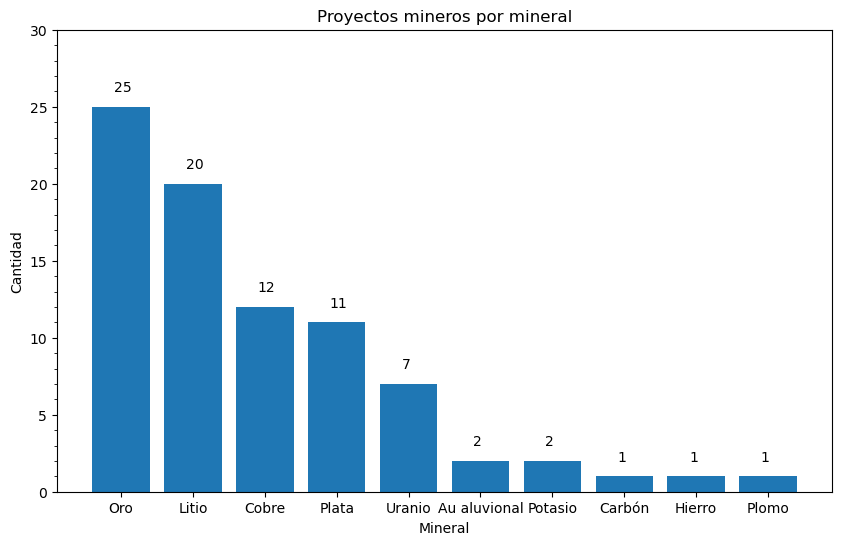

In [22]:
# Let's make a plot to show the result

# plt.style.use("")

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Proyectos mineros por mineral")
ax.set_xlabel("Mineral")
ax.set_ylabel("Cantidad")
ax.set_ylim(0, 30)

ax.bar(df_project_per_mineral["Mineral"].values, df_project_per_mineral["Count"].values)

ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

for mineral, count in zip(range(len(df_project_per_mineral["Mineral"])), df_project_per_mineral["Count"]):
    ax.text(mineral - 0.1, count + 1, f"{count}")



We can see that project related to Gold (Oro) exploration are the most frequent followed by Lithium (Litio) and Cupper (Cobre) 

Next, we are going to do something similar but with provinces. Let's see which province concentrates the major quantity of projects


In [26]:
df_project_per_province = gdf_mining_projects.groupby("nam").agg(
    {"nombre": "count"}).reset_index(names="Provincia") \
        .rename(columns={"nombre": "Count"}).sort_values(by="Count")

<BarContainer object of 9 artists>

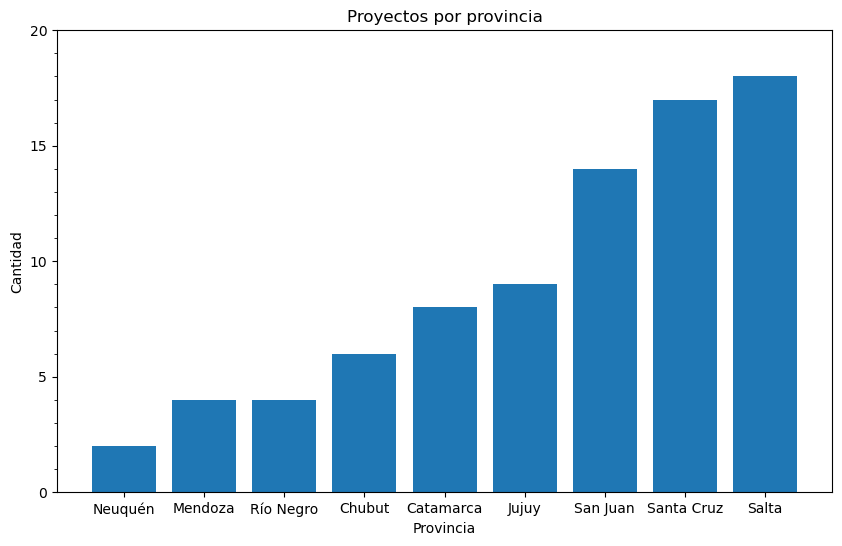

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Proyectos por provincia")
ax.set_ylabel("Cantidad")
ax.set_xlabel("Provincia")

ax.set_ylim(0, 20)

ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.bar(df_project_per_province["Provincia"], df_project_per_province["Count"])